In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [140]:
df = pd.read_csv('House_Rent_Dataset.csv')

In [141]:
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [142]:
df["Tenant Preferred"].unique()
# df["City"].unique()

array(['Bachelors/Family', 'Bachelors', 'Family'], dtype=object)

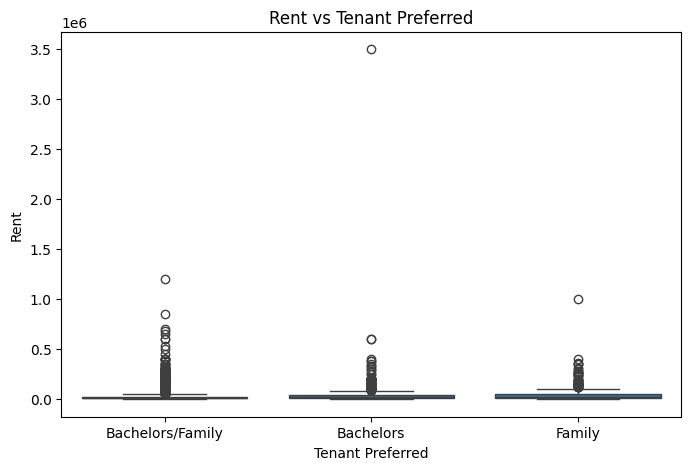

In [143]:
# plot a graph for rent vs tenant preferred
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["Tenant Preferred"], y=df["Rent"])
plt.xlabel("Tenant Preferred")
plt.ylabel("Rent")
plt.title("Rent vs Tenant Preferred")
plt.show()

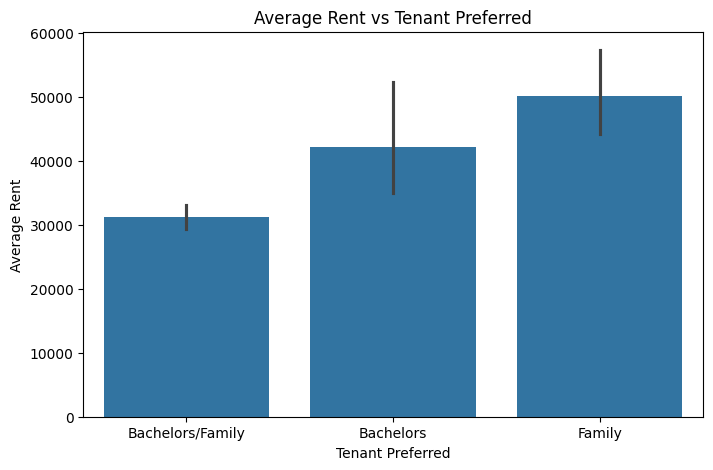

In [144]:
plt.figure(figsize=(8, 5))
sns.barplot(x=df["Tenant Preferred"], y=df["Rent"], estimator=lambda x: sum(x)/len(x))
plt.xlabel("Tenant Preferred")
plt.ylabel("Average Rent")
plt.title("Average Rent vs Tenant Preferred")
plt.show()


In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [146]:
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


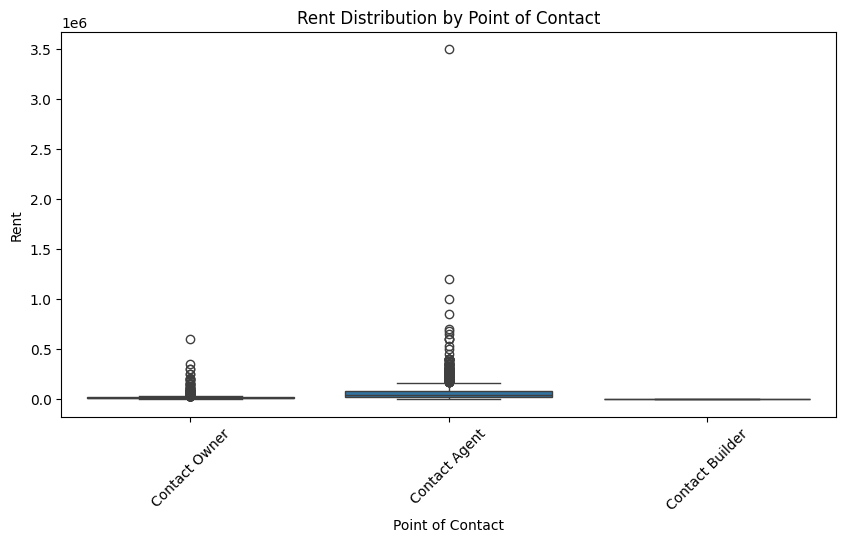

In [147]:
# Check Rent Distribution Across Point of Contact
plt.figure(figsize=(10, 5))
sns.boxplot(x=df["Point of Contact"], y=df["Rent"])
plt.xticks(rotation=45)
plt.title("Rent Distribution by Point of Contact")
plt.show()
 

In [148]:
df.groupby("Point of Contact")["Rent"].agg(["mean", "median", "std"])


,mean,median,std
Point of Contact,,,
Contact Agent,73481.158927,45000.0,125732.206670
Contact Builder,5500.000000,5500.0,NaN
Contact Owner,16704.206468,12500.0,21239.629404


In [149]:
from scipy.stats import f_oneway

groups = [group["Rent"].values for _, group in df.groupby("Point of Contact")]
stat, p_value = f_oneway(*groups)
print(f"ANOVA Test p-value: {p_value}")

if p_value < 0.05:
    print("Significant dependency between Rent and Point of Contact.")
else:
    print("No strong dependency between Rent and Point of Contact.")

ANOVA Test p-value: 4.681611702100115e-127
Significant dependency between Rent and Point of Contact.


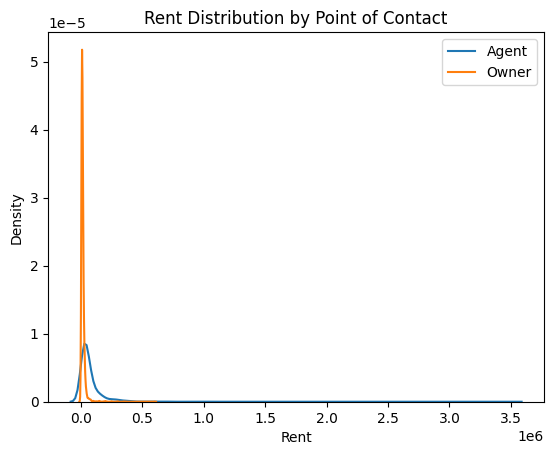

In [150]:
import seaborn as sns
sns.kdeplot(df[df["Point of Contact"] == "Contact Agent"]["Rent"], label="Agent")
sns.kdeplot(df[df["Point of Contact"] == "Contact Owner"]["Rent"], label="Owner")
plt.legend()
plt.title("Rent Distribution by Point of Contact")
plt.show()


In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [152]:
def to_snake_case(s: str) -> str:
    return '_'.join(s.lower().split())
df.columns = [to_snake_case(col) for col in df.columns]

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   posted_on          4746 non-null   object
 1   bhk                4746 non-null   int64 
 2   rent               4746 non-null   int64 
 3   size               4746 non-null   int64 
 4   floor              4746 non-null   object
 5   area_type          4746 non-null   object
 6   area_locality      4746 non-null   object
 7   city               4746 non-null   object
 8   furnishing_status  4746 non-null   object
 9   tenant_preferred   4746 non-null   object
 10  bathroom           4746 non-null   int64 
 11  point_of_contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [154]:
df["rent"] = df.pop("rent")

In [155]:
df.head()

,posted_on,bhk,size,floor,area_type,area_locality,city,furnishing_status,tenant_preferred,bathroom,point_of_contact,rent
0,2022-05-18,2,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,10000
1,2022-05-13,2,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,20000
2,2022-05-16,2,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,17000
3,2022-07-04,2,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,10000
4,2022-05-09,2,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner,7500


In [156]:
# let remove `posted_on` and `area_locality` as it is not used
df = df.drop(columns=['posted_on', 'area_locality'])
df.head()

,bhk,size,floor,area_type,city,furnishing_status,tenant_preferred,bathroom,point_of_contact,rent
0,2,1100,Ground out of 2,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,10000
1,2,800,1 out of 3,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,20000
2,2,1000,1 out of 3,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,17000
3,2,800,1 out of 2,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,10000
4,2,850,1 out of 2,Carpet Area,Kolkata,Unfurnished,Bachelors,1,Contact Owner,7500


In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   bhk                4746 non-null   int64 
 1   size               4746 non-null   int64 
 2   floor              4746 non-null   object
 3   area_type          4746 non-null   object
 4   city               4746 non-null   object
 5   furnishing_status  4746 non-null   object
 6   tenant_preferred   4746 non-null   object
 7   bathroom           4746 non-null   int64 
 8   point_of_contact   4746 non-null   object
 9   rent               4746 non-null   int64 
dtypes: int64(4), object(6)
memory usage: 370.9+ KB


In [158]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['rent_scaled'] = scaler.fit_transform(df[['rent']])
df[['rent', 'rent_scaled']].head()

,rent,rent_scaled
0,10000,0.002515
1,20000,0.005373
2,17000,0.004516
3,10000,0.002515
4,7500,0.001801


In [159]:
# Check for negative values in the 'rent' column
has_negative_values = (df['rent'] < 0).any()

# Print the result
if has_negative_values:
    print("The 'rent' column contains negative values.")
else:
    print("The 'rent' column does NOT contain negative values.")

The 'rent' column does NOT contain negative values.


In [160]:
df["rent_scaled"] = df["rent_scaled"]*1000 # round them to only two decimal place
df.head()

,bhk,size,floor,area_type,city,furnishing_status,tenant_preferred,bathroom,point_of_contact,rent,rent_scaled
0,2,1100,Ground out of 2,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,10000,2.515148
1,2,800,1 out of 3,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,20000,5.373271
2,2,1000,1 out of 3,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,17000,4.515834
3,2,800,1 out of 2,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,10000,2.515148
4,2,850,1 out of 2,Carpet Area,Kolkata,Unfurnished,Bachelors,1,Contact Owner,7500,1.800617


In [161]:
df["rent_scaled"] = df["rent_scaled"].round(2)

df.head()

,bhk,size,floor,area_type,city,furnishing_status,tenant_preferred,bathroom,point_of_contact,rent,rent_scaled
0,2,1100,Ground out of 2,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,10000,2.52
1,2,800,1 out of 3,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,20000,5.37
2,2,1000,1 out of 3,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,17000,4.52
3,2,800,1 out of 2,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,10000,2.52
4,2,850,1 out of 2,Carpet Area,Kolkata,Unfurnished,Bachelors,1,Contact Owner,7500,1.80


In [162]:
df["rent"] = df["rent_scaled"]

df = df.drop(columns=["rent_scaled"])

df.head()

,bhk,size,floor,area_type,city,furnishing_status,tenant_preferred,bathroom,point_of_contact,rent
0,2,1100,Ground out of 2,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,2.52
1,2,800,1 out of 3,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,5.37
2,2,1000,1 out of 3,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,4.52
3,2,800,1 out of 2,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,2.52
4,2,850,1 out of 2,Carpet Area,Kolkata,Unfurnished,Bachelors,1,Contact Owner,1.80


In [163]:
df = df.drop(columns=["floor"])
df.head()

,bhk,size,area_type,city,furnishing_status,tenant_preferred,bathroom,point_of_contact,rent
0,2,1100,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,2.52
1,2,800,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,5.37
2,2,1000,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,4.52
3,2,800,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,2.52
4,2,850,Carpet Area,Kolkata,Unfurnished,Bachelors,1,Contact Owner,1.80


In [164]:
df["tenant_preferred"].unique()

array(['Bachelors/Family', 'Bachelors', 'Family'], dtype=object)

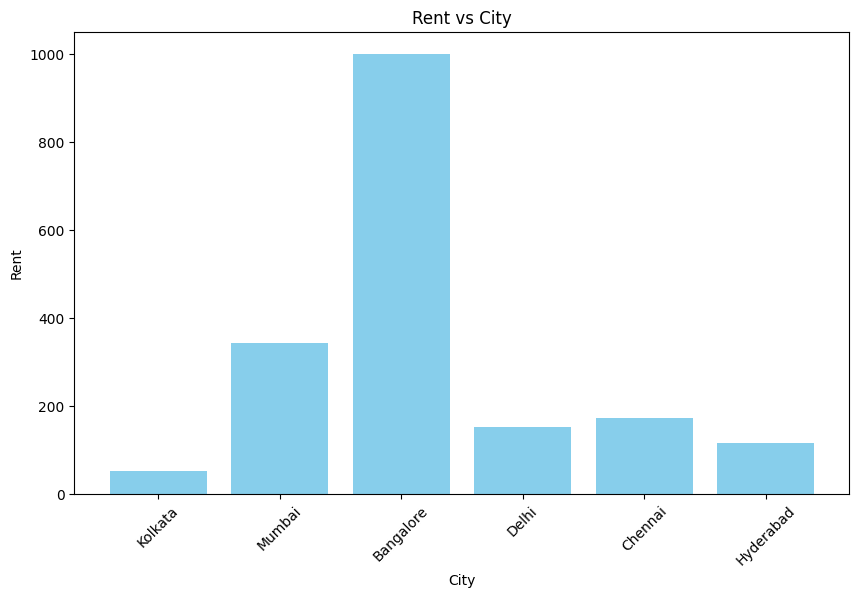

In [165]:
# Plot a graph for rent vs city
import matplotlib.pyplot as plt

# Plot rent vs city
plt.figure(figsize=(10, 6))
plt.bar(df['city'], df['rent'], color='skyblue')
plt.xlabel('City')
plt.ylabel('Rent')
plt.title('Rent vs City')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [166]:
import matplotlib.pyplot as plt
import seaborn as sns

def enum_type_vs_rent_city(col):
    # Set the figure size
    plt.figure(figsize=(12, 6))

    # Create a grouped bar plot
    sns.barplot(x='city', y='rent', hue=col, data=df, errorbar=None, palette='viridis')
    # Add labels and title
    plt.xlabel('City')
    plt.ylabel('Rent')
    plt.title(f'Rent vs City (Grouped by {col})')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.legend(title=col)
    plt.show()

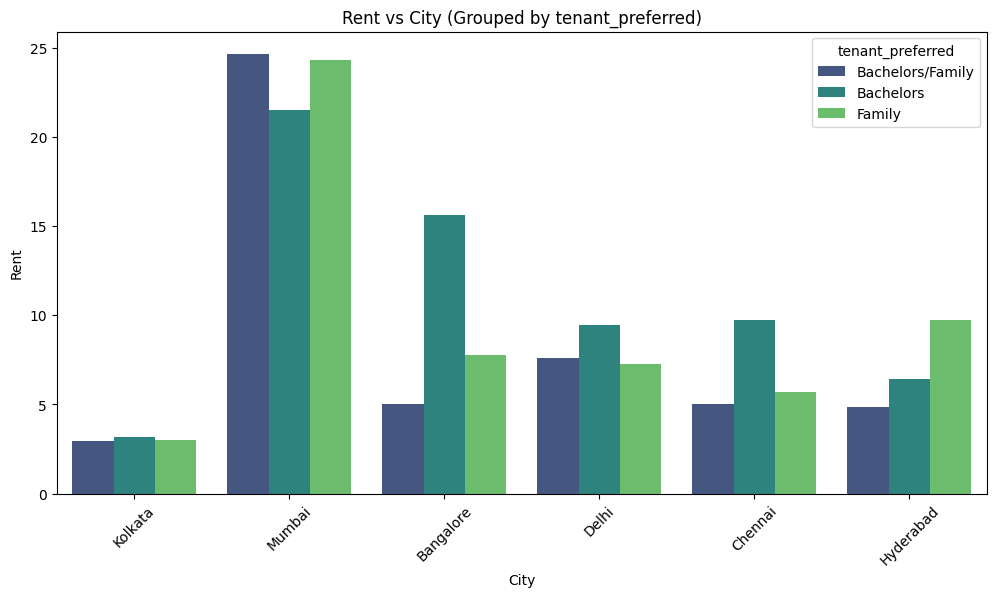

In [167]:
enum_type_vs_rent_city('tenant_preferred')

In [168]:
from scipy.stats import f_oneway

def statistical_sig(col):
    # Group rent data by tenant_preferred
    groups = [df[df[col] == tenant]['rent'] for tenant in df[col].unique()]
    # Perform one-way ANOVA
    f_statistic, p_value = f_oneway(*groups)
    # Print the results
    return f_statistic, p_value

In [169]:
# Rent vs tenant_preferred
f_statistic, p_value = statistical_sig('tenant_preferred')
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")
# Interpret the results
if p_value < 0.05:
    print("There is a statistically significant difference in rent across tenant preferences.")
else:
    print("There is NO statistically significant difference in rent across tenant preferences.")

F-statistic: 16.355603943221375
P-value: 8.34129883050611e-08
There is a statistically significant difference in rent across tenant preferences.


In [170]:
# Rent vs area_type
f_statistic, p_value = statistical_sig('area_type')
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")
# Interpret the results
if p_value < 0.05:
    print("There is a statistically significant difference in rent across Area Type.")
else:
    print("There is NO statistically significant difference in rent across Area Type.")

F-statistic: 115.8131206861592
P-value: 7.808410265479427e-50
There is a statistically significant difference in rent across Area Type.


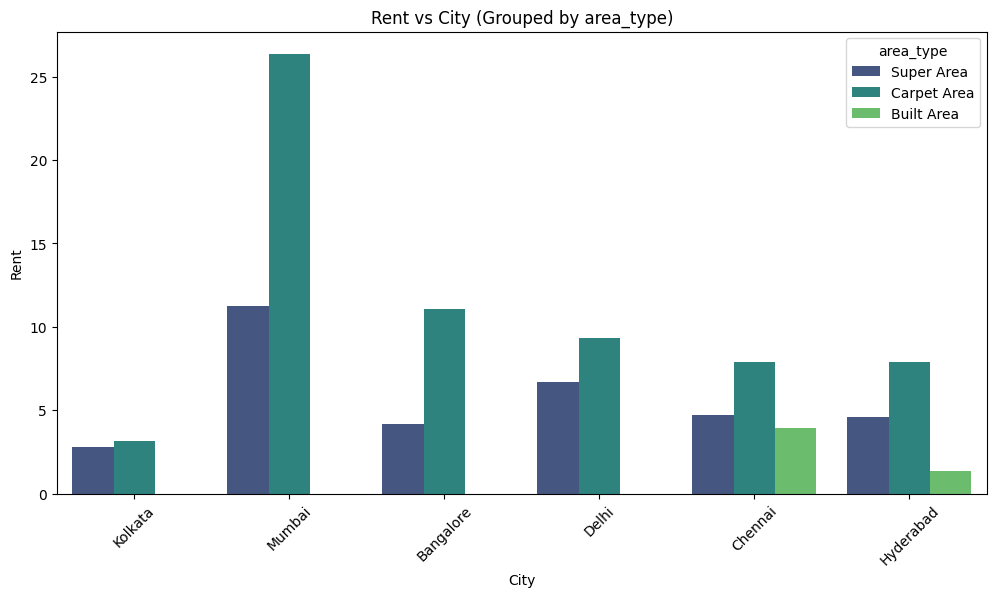

In [171]:
enum_type_vs_rent_city('area_type')


In [172]:
df.head()

,bhk,size,area_type,city,furnishing_status,tenant_preferred,bathroom,point_of_contact,rent
0,2,1100,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,2.52
1,2,800,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,5.37
2,2,1000,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,4.52
3,2,800,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,2.52
4,2,850,Carpet Area,Kolkata,Unfurnished,Bachelors,1,Contact Owner,1.80


In [174]:
# Function to transform categorical columns into numerical ranks based on average rent
def average_rent_rank_encoding(df, column, target='rent'):
    # Calculate the average rent for each unique value in the column
    avg_rent = df.groupby(column)[target].mean()
    
    # Rank the values based on average rent (higher average rent = higher rank)
    rank = avg_rent.rank(method='dense', ascending=False).astype(int)
    
    # Replace the original column values with their corresponding ranks
    df[column] = df[column].map(rank)
    
    return df

# Apply the function to all object (categorical) columns
for column in df.select_dtypes(include=['object']).columns:
    if column != 'rent':  # Skip the target column
        df = average_rent_rank_encoding(df, column)


In [175]:
df.head()

,bhk,size,area_type,city,furnishing_status,tenant_preferred,bathroom,point_of_contact,rent
0,2,1100,2,6,3,3,2,2,2.52
1,2,800,2,6,2,3,1,2,5.37
2,2,1000,2,6,2,3,1,2,4.52
3,2,800,2,6,3,3,1,2,2.52
4,2,850,1,6,3,2,1,2,1.80


In [ ]:
from sklearn.model_selection import train_test_split

target = 'rent'

X = df.drop(columns=[target])
y = df[target]

# Split data: 80% train, 10% test, 10% final
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_test, X_final, y_test, y_final = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [182]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

MAE: 7.19
MSE: 255.81
RMSE: 15.99
R² Score: 0.45


In [183]:
# Predict on final set
y_final_pred = model.predict(X_final)

# Save predictions
final_results = pd.DataFrame({'Actual Rent': y_final, 'Predicted Rent': y_final_pred})
final_results.to_csv("final_predictions.csv", index=False)
print("Final predictions saved to 'final_predictions.csv'.")

Final predictions saved to 'final_predictions.csv'.
